In [1]:
include("program.jl")

briggs2 (generic function with 2 methods)

In [3]:
using Printf

In [4]:
function complexMaxRelErr(z::Complex{BigFloat}, exact::Complex{BigFloat})
    ℜz, ℑz, ℜex, ℑex = real(z), imag(z), real(exact), imag(exact)
    if ℜex == 0
        abs((ℑz-ℑex)/ℑex)
    elseif ℑex == 0
        abs((ℜz-ℜex)/ℜex)
    else
        max(abs((ℜz-ℜex)/ℜex), abs((ℑz-ℑex)/ℑex))
    end
end

complexMaxRelErr (generic function with 1 method)

In [28]:
# we will generate #samples equally spaced numbers for ℜz and ℑz in range
# (0, +ε] for both positive, negative (inlude 0) equally spaced by ε[i]/amount
samples = 20
ε = BigFloat[10e-16, 10e-8, 10e1, 10e8, 10e16]
# we will use complexMaxRelErr() function to calculate values, and then use them
# to pick the most interesting cases where relative error is big
errors = zeros(Complex{BigFloat}, 2, length(ε), length(ε), 2*samples+1, 2*samples+1)
# indexing: errors[1, 1, 1, 1, 1]
maxes = zeros(BigFloat, 2, length(ε), length(ε))
# iterate over every combination of ranges
for εRe in 1:length(ε)
    for εIm in 1:length(ε)
        # iterate over each sample
        for k in 1:2*samples+1
            for j in 1:2*samples+1
                # fill the error array with values from complexMaxRelErr()
                ℜz, ℑz = ε[εRe]*(k-samples-1)/samples, ε[εIm]*(k-samples-1)/samples
                z = Complex{BigFloat}(BigFloat(ℜz)+BigFloat(ℑz)*im)
                # remember, that point (0+0im) produces NaN
                if ℜz == 0 && ℑz == 0
                    errors[1, εRe, εIm, k, j] = errors[2, εRe, εIm, k, j] = 0
                else
                    errors[1, εRe, εIm, k, j] = briggs1(z)
                    errors[2, εRe, εIm, k, j] = briggs2(z)
                    maxes[1, εRe, εIm] = max(maxes[1, εRe, εIm], complexMaxRelErr(errors[1, εRe, εIm, k, j], log(z)))
                    maxes[2, εRe, εIm] = max(maxes[2, εRe, εIm], complexMaxRelErr(errors[2, εRe, εIm, k, j], log(z)))
                end
            end
        end
    end
end

In [32]:
# zaprezentowany powyżej algorytm liczy maksymalne błędy względne(max z błędu względnego na części rzeczywistej i urojonej)
# dla odpowiednio: małych, średnich i dużych wartości oraz k:=54(wybór Briggsa). Dla każdej pary zakresów (ε) generuje równo
# oddalone próbki z zakresu -ε[x] +ε[x] zarówno dla części rzeczywistej jak i urojonej. Następnie zlicza największe względne 
# błędy przybliżeń i zapisuje je w tablicy maxes. Możemy zauważyć, że rzędy błędów dla algorytmu 1(oryginalnego) jak i 2(Al-Mohy)
# przy k=54 są niemal równe w każdym z przypadków, stąd wniosek, że udoskonalony algorytm ma conajmniej tak samo dobry stopień
# przybliżenia co algorytm pierwotny.

In [29]:
maxes[1, :, :]

5×5 Array{BigFloat,2}:
 2.06435e-15  1.06103e-15  2.55638e-16  1.15037e-15  2.17293e-15
 1.06103e-15  1.04179e-15  2.55638e-16  1.15037e-15  2.17293e-15
 2.55638e-16  2.55638e-16  2.74877e-16  1.15037e-15  2.17293e-15
 1.15037e-15  1.15037e-15  1.15037e-15  1.16961e-15  2.17293e-15
 2.17293e-15  2.17293e-15  2.17293e-15  2.17293e-15  2.19216e-15

In [30]:
maxes[2, :, :]

5×5 Array{BigFloat,2}:
 2.06435e-15  1.06103e-15  2.55638e-16  1.15037e-15  2.17293e-15
 1.06103e-15  1.04179e-15  2.55638e-16  1.15037e-15  2.17293e-15
 2.55638e-16  2.55638e-16  2.74877e-16  1.15037e-15  2.17293e-15
 1.15037e-15  1.15037e-15  1.15037e-15  1.16961e-15  2.17293e-15
 2.17293e-15  2.17293e-15  2.17293e-15  2.17293e-15  2.19216e-15

In [31]:
for i in 1:5 for j in 1:5 @printf("[%+.e]\t", maxes[1, i, j]-maxes[2, i, j]) end; println() end

[+2.932243e-77]	[-3.298773e-77]	[-1.759346e-76]	[-3.188814e-76]	[+1.099591e-77]	
[-1.209550e-76]	[+1.612734e-76]	[-1.649387e-76]	[+9.896320e-77]	[+3.188814e-76]	
[+1.078658e-76]	[-1.608612e-77]	[+1.869305e-76]	[+3.298774e-77]	[+5.497956e-77]	
[+2.028803e-75]	[+8.341624e-76]	[-1.647218e-75]	[-1.099591e-77]	[+4.838201e-76]	
[-2.714449e-75]	[+4.671961e-75]	[-2.914774e-75]	[-2.445090e-76]	[-1.341501e-75]	


In [1]:
# sprawdzamy błąd względny dla k= 1:200 w wypadku algorytmu 1 i 2. "Dokładną" wartością będzie biblioteczna funkcja log() 

In [55]:
# real case, check accuracy for different number of iterations for both algorithms on 20 samples
samples, maxk = 20, 200
ε = BigFloat[10e-8, 1, 10e8]
errors = zeros(BigFloat, 2, length(ε), maxk)
for range in 1:length(ε)
    for k in 1:maxk
        # calculate maximum relative error from all samples
        for j in 2:samples # to exclude case j=1 ε=1, where log = 0, hence rel. err. = NaN
            _0 = log(Complex{BigFloat}(ε[range]*j))
            _1 = briggs1(Complex{BigFloat}(ε[range]*j), k)
            _2 = briggs2(Complex{BigFloat}(ε[range]*j), k)
            errors[1, range, k] = max(errors[1, range, k], abs((real(_1)-real(_0))/real(_0)))
            errors[2, range, k] = max(errors[2, range, k], abs((real(_2)-real(_0))/real(_0)))
        end
        @printf("[r, k: %d %3d] [%.e] [%.e]\n",range, k, errors[1, range, k], errors[2, range, k])
    end
end

[r, k: 1   1] [8.703979e-01] [8.703979e-01]
[r, k: 1   2] [7.461638e-01] [7.461638e-01]
[r, k: 1   3] [5.567812e-01] [5.567812e-01]
[r, k: 1   4] [3.582778e-01] [3.582778e-01]
[r, k: 1   5] [2.065400e-01] [2.065400e-01]
[r, k: 1   6] [1.113824e-01] [1.113824e-01]
[r, k: 1   7] [5.790456e-02] [5.790456e-02]
[r, k: 1   8] [2.953077e-02] [2.953077e-02]
[r, k: 1   9] [1.491329e-02] [1.491329e-02]
[r, k: 1  10] [7.494037e-03] [7.494037e-03]
[r, k: 1  11] [3.756420e-03] [3.756420e-03]
[r, k: 1  12] [1.880567e-03] [1.880567e-03]
[r, k: 1  13] [9.408735e-04] [9.408735e-04]
[r, k: 1  14] [4.705844e-04] [4.705844e-04]
[r, k: 1  15] [2.353291e-04] [2.353291e-04]
[r, k: 1  16] [1.176738e-04] [1.176738e-04]
[r, k: 1  17] [5.883920e-05] [5.883920e-05]
[r, k: 1  18] [2.942018e-05] [2.942018e-05]
[r, k: 1  19] [1.471023e-05] [1.471023e-05]
[r, k: 1  20] [7.355153e-06] [7.355153e-06]
[r, k: 1  21] [3.677585e-06] [3.677585e-06]
[r, k: 1  22] [1.838795e-06] [1.838795e-06]
[r, k: 1  23] [9.193980e-07] [9.

[r, k: 1 188] [2.352150e-22] [1.965869e-56]
[r, k: 1 189] [4.865780e-22] [9.829344e-57]
[r, k: 1 190] [9.076102e-22] [4.914672e-57]
[r, k: 1 191] [1.872982e-21] [2.457336e-57]
[r, k: 1 192] [3.803727e-21] [1.228668e-57]
[r, k: 1 193] [7.306218e-21] [6.143340e-58]
[r, k: 1 194] [1.513926e-20] [3.071670e-58]
[r, k: 1 195] [2.856843e-20] [1.535835e-58]
[r, k: 1 196] [5.786457e-20] [7.679175e-59]
[r, k: 1 197] [1.196484e-19] [3.839588e-59]
[r, k: 1 198] [2.455814e-19] [1.919794e-59]
[r, k: 1 199] [5.089439e-19] [9.598969e-60]
[r, k: 1 200] [9.536623e-19] [4.799484e-60]
[r, k: 2   1] [1.318055e+00] [1.318055e+00]
[r, k: 2   2] [4.884408e-01] [4.884408e-01]
[r, k: 2   3] [2.129667e-01] [2.129667e-01]
[r, k: 2   4] [9.974341e-02] [9.974341e-02]
[r, k: 2   5] [4.830383e-02] [4.830383e-02]
[r, k: 2   6] [2.377364e-02] [2.377364e-02]
[r, k: 2   7] [1.179391e-02] [1.179391e-02]
[r, k: 2   8] [5.873930e-03] [5.873930e-03]
[r, k: 2   9] [2.931234e-03] [2.931234e-03]
[r, k: 2  10] [1.464187e-03] [1.

[r, k: 2 177] [4.417302e-24] [7.819226e-54]
[r, k: 2 178] [4.417302e-24] [3.909613e-54]
[r, k: 2 179] [7.192068e-24] [1.954807e-54]
[r, k: 2 180] [1.923898e-23] [9.774033e-55]
[r, k: 2 181] [4.260512e-23] [4.887016e-55]
[r, k: 2 182] [1.189808e-22] [2.443508e-55]
[r, k: 2 183] [2.717320e-22] [1.221754e-55]
[r, k: 2 184] [5.772346e-22] [6.108770e-56]
[r, k: 2 185] [5.772346e-22] [3.054385e-56]
[r, k: 2 186] [9.825018e-22] [1.527193e-56]
[r, k: 2 187] [3.021255e-21] [7.635963e-57]
[r, k: 2 188] [4.140249e-21] [3.817981e-57]
[r, k: 2 189] [6.958263e-21] [1.908991e-57]
[r, k: 2 190] [2.257342e-20] [9.544954e-58]
[r, k: 2 191] [6.167775e-20] [4.772477e-58]
[r, k: 2 192] [1.398864e-19] [2.386238e-58]
[r, k: 2 193] [2.963037e-19] [1.193119e-58]
[r, k: 2 194] [3.276954e-19] [5.965596e-59]
[r, k: 2 195] [9.219729e-19] [2.982798e-59]
[r, k: 2 196] [1.117202e-18] [1.491399e-59]
[r, k: 2 197] [3.424650e-18] [7.456995e-60]
[r, k: 2 198] [5.854242e-18] [3.728498e-60]
[r, k: 2 199] [1.343536e-17] [1.

[r, k: 3 165] [3.355238e-29] [2.535812e-49]
[r, k: 3 166] [6.793264e-29] [1.267906e-49]
[r, k: 3 167] [1.322612e-28] [6.339530e-50]
[r, k: 3 168] [2.583787e-28] [3.169765e-50]
[r, k: 3 169] [5.171763e-28] [1.584883e-50]
[r, k: 3 170] [1.076175e-27] [7.924413e-51]
[r, k: 3 171] [2.159088e-27] [3.962206e-51]
[r, k: 3 172] [4.455278e-27] [1.981103e-51]
[r, k: 3 173] [8.491163e-27] [9.905516e-52]
[r, k: 3 174] [1.737098e-26] [4.952758e-52]
[r, k: 3 175] [3.513062e-26] [2.476379e-52]
[r, k: 3 176] [7.064990e-26] [1.238189e-52]
[r, k: 3 177] [1.416885e-25] [6.190947e-53]
[r, k: 3 178] [2.907290e-25] [3.095474e-53]
[r, k: 3 179] [5.939771e-25] [1.547737e-53]
[r, k: 3 180] [1.104453e-24] [7.738684e-54]
[r, k: 3 181] [2.301663e-24] [3.869342e-54]
[r, k: 3 182] [4.696082e-24] [1.934671e-54]
[r, k: 3 183] [9.484921e-24] [9.673355e-55]
[r, k: 3 184] [1.906260e-23] [4.836678e-55]
[r, k: 3 185] [3.821795e-23] [2.418339e-55]
[r, k: 3 186] [7.652866e-23] [1.209169e-55]
[r, k: 3 187] [1.447526e-22] [6.

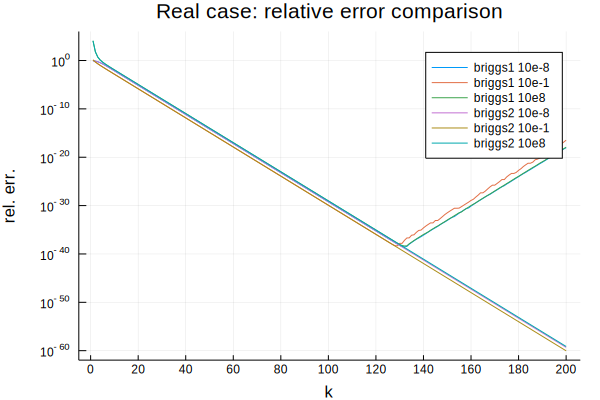

In [45]:
using Plots;
plot(title = "Real case: relative error comparison", xlabel="k", ylabel="rel. err.", yscale=:log10,
      label = "briggs1 10e-8", collect(1:maxk), errors[1, 1, :])
plot!(label = "briggs1 10e-1", collect(1:maxk), errors[1, 2, :])
plot!(label = "briggs1 10e8",  collect(1:maxk), errors[1, 3, :])

plot!(label = "briggs2 10e-8", collect(1:maxk), errors[2, 1, :])
plot!(label = "briggs2 10e-1", collect(1:maxk), errors[2, 2, :])
plot!(label = "briggs2 10e8",  collect(1:maxk), errors[2, 3, :])
xticks!(0:20:maxk)

In [37]:
# Bardzo dobrze widać przewagę udoskonalonego algorytmu nad oryginalną metodą Briggsa: Przy  większych niż 130 pierwsza metoda
# jest obarczona tak dużym błędem numerycznym, że każdka kolejna iteracja powoduje pogorszenie wyniku. Z tego powodu nie jesteśmy
# w stanie uzyskać przybliżeń dokładniejszych niż ~10e-39 na liczbach typu BigFloat(256 bitów). Błąd drugiej metoda zbiega
# logarytmicznie do zera, dzięki czemu możemy uzyskiwać coraz lepsze przybliżenia. Warto może zastanowić się, jaką 
# dokładność możemy otrzymać samym algorytmem 2 i jak zachowa się on dla jeszcze większych k na liczbach rzeczywistych.

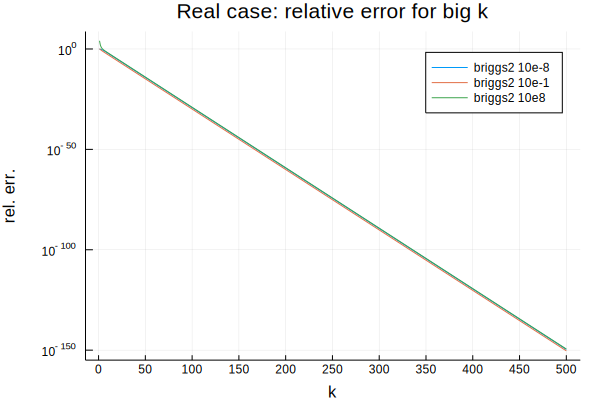

In [65]:
setprecision(512) do # na 256 precyzji nie otrzymamy lepszych wyników niż ~10e-75
    samples, maxk = 20, 500
    ε = BigFloat[10e-8, 1, 10e8]
    errors2 = zeros(BigFloat, length(ε), maxk)
    for range in 1:length(ε)
        for k in 1:maxk
            # calculate maximum relative error from all samples
            for j in 2:samples # to exclude case j=1 ε=1, where log = 0, hence rel. err. = NaN
                _0 = log(Complex{BigFloat}(ε[range]*j))
                _2 = briggs2(Complex{BigFloat}(ε[range]*j), k)
                errors2[range, k] = max(errors2[range, k], abs((real(_2)-real(_0))/real(_0)))
            end
        end
    end
    
    plot(title = "Real case: relative error for big k", xlabel="k", ylabel="rel. err.",
      label = "briggs2 10e-8", collect(1:maxk), errors2[1, :], yscale=:log10)
    plot!(label = "briggs2 10e-1", collect(1:maxk), errors2[2, :])
    plot!(label = "briggs2 10e8", collect(1:maxk), errors2[3, :])
    xticks!(0:50:maxk)
end